In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from matplotlib import pyplot as pl

In [19]:
df = pd.read_csv("Balanced Loan data.csv")

In [20]:
# Checking for missing values( false means there are no missing values)
df.isna().any()

member_id      False
loan_amnt      False
int_rate       False
installment    False
annual_inc     False
loan_status    False
dtype: bool

In [21]:
df.isna().sum()

member_id      0
loan_amnt      0
int_rate       0
installment    0
annual_inc     0
loan_status    0
dtype: int64

In [22]:
#shows the correlation (relationship) between the variables
correlation = df.corr()
correlation

,member_id,loan_amnt,int_rate,installment,annual_inc,loan_status
member_id,1.000000,0.079768,0.165543,0.046290,-0.010834,0.409164
loan_amnt,0.079768,1.000000,0.212259,0.951491,0.367615,0.114264
int_rate,0.165543,0.212259,1.000000,0.197562,-0.062583,0.348325
installment,0.046290,0.951491,0.197562,1.000000,0.362475,0.077964
annual_inc,-0.010834,0.367615,-0.062583,0.362475,1.000000,-0.101175
loan_status,0.409164,0.114264,0.348325,0.077964,-0.101175,1.000000


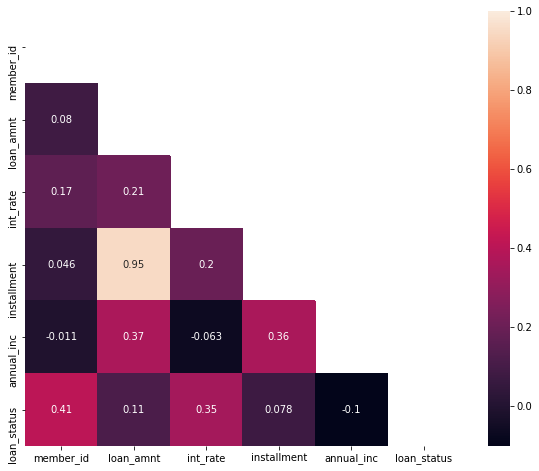

In [23]:
#visualiizing 
#plotting a heatmap for to the correlation
plt.figure(figsize=(10,8))
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation, annot=True, square = True, mask = mask)

In [24]:
plt.rcParams['figure.figsize']= (8,4)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415272 entries, 0 to 415271
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   member_id    415272 non-null  int64  
 1   loan_amnt    415272 non-null  int64  
 2   int_rate     415272 non-null  float64
 3   installment  415272 non-null  float64
 4   annual_inc   415272 non-null  float64
 5   loan_status  415272 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 19.0 MB


In [26]:
df.shape

(415272, 6)

In [27]:
X = df.iloc[:, 1:5].values
y = df.iloc[:, 5].values

In [28]:
print(df["loan_status"].value_counts())

0    207723
1    207549
Name: loan_status, dtype: int64


In [29]:
df = df.drop(["member_id"],axis = True)
df.head(5)

,loan_amnt,int_rate,installment,annual_inc,loan_status
0,5000,10.65,162.87,24000.0,0
1,2400,15.96,84.33,12252.0,0
2,10000,13.49,339.31,49200.0,0
3,5000,7.90,156.46,36000.0,0
4,3000,18.64,109.43,48000.0,0


In [30]:
# Training and Test split into 80% training data and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [31]:
X_train.shape, X_test.shape

((332217, 4), (83055, 4))

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
 #Importing libraries required for building a neural network (Keras & classes)
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [33]:
# reinstalling tenserflow because i got an error
pip install tensorflow==1.2.0 --ignore-installed

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==1.2.0 (from versions: 1.13.0rc1, 1.13.0rc2, 1.13.1, 1.13.2, 1.14.0rc0, 1.14.0rc1, 1.14.0, 1.15.0rc0, 1.15.0rc1, 1.15.0rc2, 1.15.0rc3, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 2.0.0a0, 2.0.0b0, 2.0.0b1, 2.0.0rc0, 2.0.0rc1, 2.0.0rc2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.1.0rc0, 2.1.0rc1, 2.1.0rc2, 2.1.0, 2.1.1, 2.1.2, 2.2.0rc0, 2.2.0rc1, 2.2.0rc2, 2.2.0rc3, 2.2.0rc4, 2.2.0, 2.2.1, 2.3.0rc0, 2.3.0rc1, 2.3.0rc2, 2.3.0, 2.3.1, 2.4.0rc0, 2.4.0rc1)
ERROR: No matching distribution found for tensorflow==1.2.0


In [35]:
#Initializing the Artificial Neural Network
classifier = Sequential()

In [36]:
#Adding the input layer and a hidden layer
classifier.add(Dense(output_dim = 3, init = 'uniform', activation = 'relu',
input_dim = 4))
                     
#Adding second hidden layer
classifier.add(Dense(output_dim = 3, init = 'uniform', activation = 'relu'))    
                     
#Adding output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

#Compiling the artificial neural network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
metrics = ['accuracy'])
                     
#Fitting artifical neural network to the training set
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 20)                  

C:\Users\PRISCILLA\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=4, units=3, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\PRISCILLA\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=3, kernel_initializer="uniform")`
  
C:\Users\PRISCILLA\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\PRISCILLA\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Epoch 1/20
332217/332217 [==============================] - 144s 434us/step - loss: 0.5800 - accuracy: 0.6916
Epoch 2/20
332217/332217 [==============================] - 149s 449us/step - loss: 0.5574 - accuracy: 0.7111
Epoch 3/20
332217/332217 [==============================] - 144s 432us/step - loss: 0.5232 - accuracy: 0.7248
Epoch 4/20
332217/332217 [==============================] - 143s 431us/step - loss: 0.5162 - accuracy: 0.7230
Epoch 5/20
332217/332217 [==============================] - 144s 433us/step - loss: 0.5144 - accuracy: 0.7239
Epoch 6/20
332217/332217 [==============================] - 138s 416us/step - loss: 0.5140 - accuracy: 0.7237
Epoch 7/20
332217/332217 [==============================] - 146s 438us/step - loss: 0.5136 - accuracy: 0.7234
Epoch 8/20
332217/332217 [==============================] - 140s 422us/step - loss: 0.5137 - accuracy: 0.7237
Epoch 9/20
332217/332217 [==============================] - 1551s 5ms/step - loss: 0.5135 - accuracy: 0.7237
Epoch 10/20

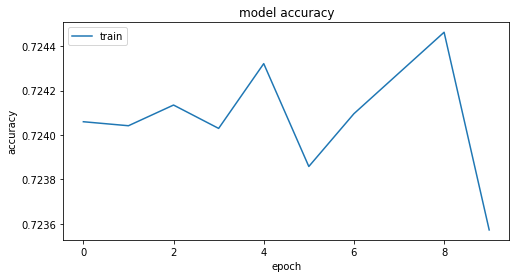

In [48]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [43]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred[:10]


array([[0.6132176 ],
       [0.25347888],
       [0.6382509 ],
       [0.42024037],
       [0.5759124 ],
       [0.13054122],
       [0.4890718 ],
       [0.6755706 ],
       [0.3669116 ],
       [0.8293572 ]], dtype=float32)

In [44]:
#Converting probabilities into a binary result
# The condition set generates different results based on where true or false
y_pred = (y_pred > 0.5)
y_pred[:10]

array([[ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True]])

In [45]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[29780, 11904],
       [11162, 30209]], dtype=int64)

In [56]:
# Accuracy
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_test, y_pred)
Accuracy

0.7222804165914153

In [58]:
# Recall
from sklearn.metrics import recall_score
Recall= recall_score(y_test, y_pred, average=None)
Recall

array([0.7144228 , 0.73019748])

In [59]:
# Precision
from sklearn.metrics import precision_score
Precision = precision_score(y_test, y_pred, average=None)
Precision

array([0.72737043, 0.71733194])

In [68]:
# F1_Score
from sklearn.metrics import f1_score
F1_Score = f1_score(y_test, y_pred, average=None)
F1_Score

array([0.72083848, 0.72370754])